In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import re
import string

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

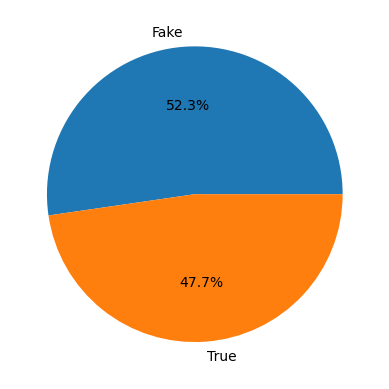

In [25]:
value_count = list((len(df_fake),len(df_true)))
my_labels = ["Fake","True"]
plt.pie(value_count,labels= my_labels,autopct="%1.1f%%")
plt.show

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

In [4]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [5]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [6]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [7]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
df = df.sample(frac = 1)
df.head()

,text,class
20132,The number of Muslim registered voters is up 3...,0
20092,BRUSSELS (Reuters) - An independent Catalonia ...,1
8695,While much of the nation s attention has been ...,0
20572,"(Reuters) - Hurricane Irma, a deadly, devastat...",1
8106,Kentucky governor Matt Bevin recently introduc...,0


In [9]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
print(df.columns)
print(df.head())

Index(['text', 'class'], dtype='object')
                                                text  class
0  The number of Muslim registered voters is up 3...      0
1  BRUSSELS (Reuters) - An independent Catalonia ...      1
2  While much of the nation s attention has been ...      0
3  (Reuters) - Hurricane Irma, a deadly, devastat...      1
4  Kentucky governor Matt Bevin recently introduc...      0


In [10]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [11]:
df["text"] = df["text"].apply(wordopt)

In [12]:
x = df["text"]
y = df["class"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
vectorization = TfidfVectorizer()

In [15]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [16]:
MNB_classifier = MultinomialNB()

In [17]:
MNB_classifier.fit(xv_train, y_train)

MultinomialNB()

In [18]:
y_pred = MNB_classifier.predict(xv_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4724
           1       0.94      0.92      0.93      4256

    accuracy                           0.94      8980
   macro avg       0.94      0.93      0.94      8980
weighted avg       0.94      0.94      0.94      8980

